 # <font color=red>  Chapter 1: Data Preprocessing </font>

<h4><font color= '#CD4662'> 1. Import Libraries

In [1]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: D:\BroadwayDataScience\env\Scripts\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import chi2_contingency
from scipy import stats

<h4><font color= '#CD4662'> 2. Loading the dataset

In [3]:
df_master= pd.read_csv('Secondary_school_dropout_dataset.csv')
df_master.head(5)

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11.0,Male,Primary,Form Two,Walk,More than five,No
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11.0,Male,Primary,Form One,Walk,More than five,Yes
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11.0,Female,Secondary,Form Two,Public transport,More than five,No
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11.0,Male,Primary,Form One,Walk,Five Children,No
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,NaN,Female,Secondary,Form One,Public transport,More than five,No


In [4]:
df_master.shape

(62739, 13)

In [5]:
df= df_master.copy()

In [6]:
df.isna().sum()

location_name            0
home_language            3
hh_occupation            4
hh_edu               59578
hh_size                  0
school_distanceKm        0
age                     90
gender                   0
mothers_edu          32009
grade                    0
meansToSchool            0
hh_children              0
dropout                  0
dtype: int64

In [7]:
df.describe()

,age
count,62649.000000
mean,15.511708
std,0.721693
min,11.000000
25%,15.000000
50%,16.000000
75%,16.000000
max,16.000000


In [8]:
df.describe(include='O')

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
count,62739,62736,62735,3161,62739,62739,62739,30730,62739,62739,62739,62739
unique,2,3,6,3,5,8,2,3,4,4,5,2
top,Rural,English,Unemployed,Primary,More than five,2-3 km,Female,Primary,Form One,Walk,Three Children,No
freq,62710,58486,55122,2851,46969,62057,35055,29156,40119,56763,15315,57032


In [9]:
# Function to replace NaN values with the most frequent attribute
def replace_nan_with_most_frequent(df, column_name):
    # Get unique values and their counts
    attrib, counts = np.unique(df[column_name].dropna(), return_counts=True)
    
    # Find the most frequent attribute
    most_freq_attrib = attrib[np.argmax(counts)]
    
    # Replace NaN values with the most frequent attribute
    df.loc[pd.isna(df[column_name]), column_name] = most_freq_attrib
    
# Replace NaN values in 'home_language' and 'hh_occupation'
replace_nan_with_most_frequent(df, 'home_language')
replace_nan_with_most_frequent(df, 'hh_occupation')
replace_nan_with_most_frequent(df,'hh_edu')
replace_nan_with_most_frequent(df, 'mothers_edu')


In [10]:
df.isna().sum()

location_name         0
home_language         0
hh_occupation         0
hh_edu                0
hh_size               0
school_distanceKm     0
age                  90
gender                0
mothers_edu           0
grade                 0
meansToSchool         0
hh_children           0
dropout               0
dtype: int64

In [11]:
df["hh_occupation"][df['hh_occupation']=='nan']

Series([], Name: hh_occupation, dtype: object)

In [12]:
df['hh_occupation'].unique()

array(['Unemployed', 'Self-employed', 'Agriculture', 'Public sector',
       'Housewife', 'Private sector'], dtype=object)

In [13]:
df['home_language'][df['home_language']=='nan']

Series([], Name: home_language, dtype: object)

<Axes: xlabel='dropout', ylabel='count'>

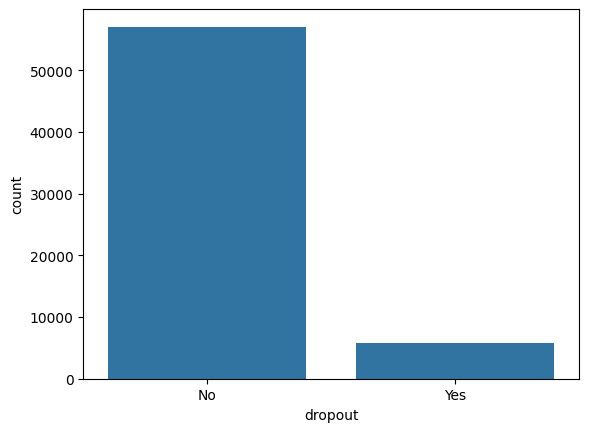

In [14]:
sns.countplot(x='dropout', data=df)
            

In [15]:
df["dropout"]=df["dropout"].map({'No':0, 'Yes':1})
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11.0,Male,Primary,Form Two,Walk,More than five,0
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11.0,Male,Primary,Form One,Walk,More than five,1
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11.0,Female,Secondary,Form Two,Public transport,More than five,0
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11.0,Male,Primary,Form One,Walk,Five Children,0
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,NaN,Female,Secondary,Form One,Public transport,More than five,0


<Axes: xlabel='age', ylabel='count'>

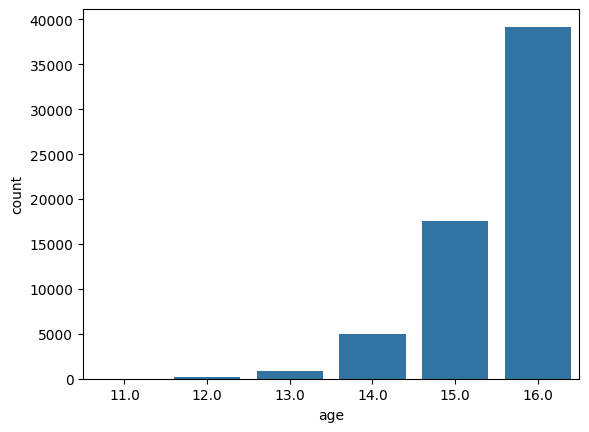

In [16]:
sns.countplot(x= 'age', data= df)

<Axes: xlabel='age', ylabel='count'>

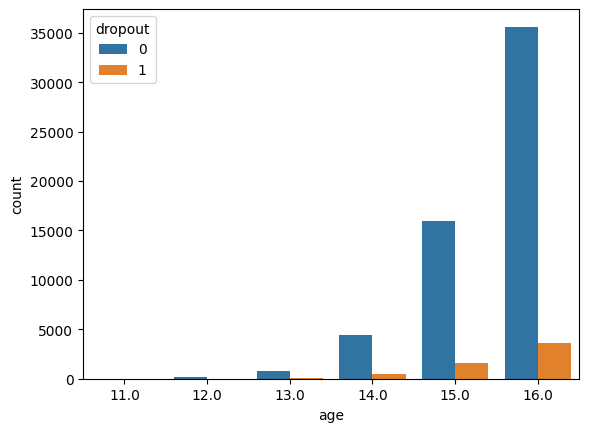

In [17]:
sns.countplot(x='age', hue='dropout', data=df)

<Axes: xlabel='grade', ylabel='count'>

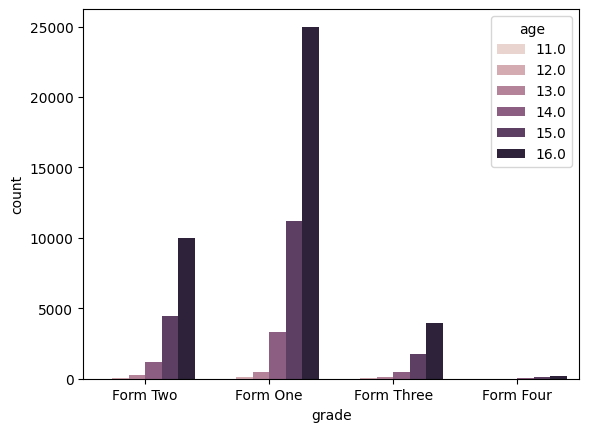

In [18]:
sns.countplot(x='grade', hue='age', data=df)

<Axes: xlabel='grade', ylabel='count'>

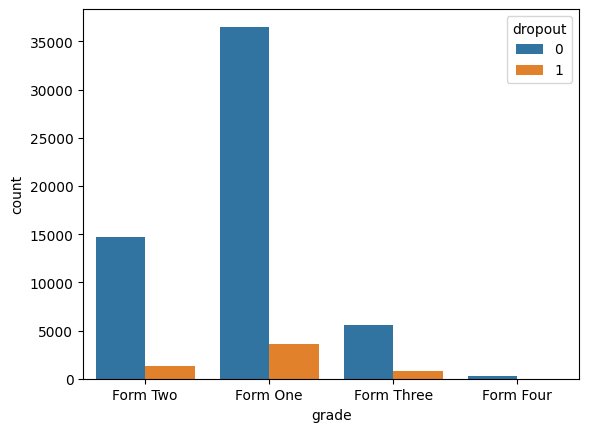

In [19]:
sns.countplot(x='grade', hue='dropout',data=df)

<h2>Grade and Age are interrelated so,
missing age can be filled using the mean of the age of each grade

In [20]:
df['grade'].value_counts()

grade
Form One      40119
Form Two      15971
Form Three     6327
Form Four       322
Name: count, dtype: int64

In [21]:
df.groupby('grade')['age'].mean()

grade
Form Four     15.552795
Form One      15.510086
Form Three    15.519380
Form Two      15.511911
Name: age, dtype: float64

In [22]:
df.loc[(df.age.isnull())& (df.grade=='Form Four'),'age']=15.552
df.loc[(df.age.isnull())& (df.grade=='Form One'),'age']=15.51
df.loc[(df.age.isnull())& (df.grade=='Form Three'),'age']=15.5193
df.loc[(df.age.isnull())& (df.grade=='Form Two'), 'age']=15.5119



In [23]:
df.age.isnull().any()

False

<Axes: xlabel='dropout', ylabel='count'>

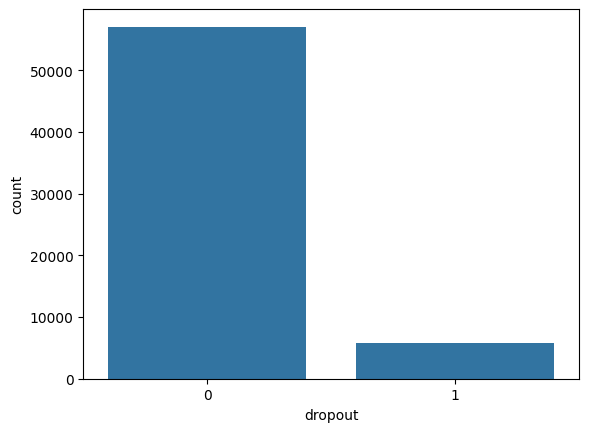

In [24]:
sns.countplot(x= 'dropout', data= df)


In [25]:
df

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11.00,Male,Primary,Form Two,Walk,More than five,0
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11.00,Male,Primary,Form One,Walk,More than five,1
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11.00,Female,Secondary,Form Two,Public transport,More than five,0
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11.00,Male,Primary,Form One,Walk,Five Children,0
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,15.51,Female,Secondary,Form One,Public transport,More than five,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62734,Rural,English,Unemployed,Primary,Four Children,2-3 km,16.00,Female,Primary,Form One,Bicycle/motorbike,Two Children,0
62735,Rural,English,Unemployed,Primary,Five Children,2-3 km,16.00,Male,Primary,Form Two,Walk,Two Children,0
62736,Rural,English,Unemployed,Primary,More than five,2-3 km,16.00,Female,Primary,Form Three,Walk,Three Children,0
62737,Rural,English,Unemployed,Primary,Three Children,2-3 km,16.00,Female,Primary,Form One,Walk,Two Children,0


In [26]:
df.isnull().sum() 

location_name        0
home_language        0
hh_occupation        0
hh_edu               0
hh_size              0
school_distanceKm    0
age                  0
gender               0
mothers_edu          0
grade                0
meansToSchool        0
hh_children          0
dropout              0
dtype: int64

In [27]:
features = [
    'location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size', 
    'school_distanceKm', 'age', 'gender', 'mothers_edu', 'grade', 
    'meansToSchool', 'hh_children', 'dropout'
]

# Loop through the feature list and print unique values for each column
for i in features:
    try:
        print(f"{i}: {df[i].unique()}")
    except KeyError:
        print(f"Column '{i}' does not exist in the DataFrame")

location_name: ['Rural' 'Urban']
home_language: ['English' 'Kiswahili' 'Native language']
hh_occupation: ['Unemployed' 'Self-employed' 'Agriculture' 'Public sector' 'Housewife'
 'Private sector']
hh_edu: ['Secondary' 'Primary' 'Postsecondary']
hh_size: ['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
school_distanceKm: ['1-2 km' '2-3 km' '4-5 km' 'More than 11 km' '0-0.5 km' '6-7 km'
 '0.5-1 km' '7-10 km']
age: [11.     15.51   15.5119 12.     15.5193 13.     14.     15.     16.    ]
gender: ['Male' 'Female']
mothers_edu: ['Primary' 'Secondary' 'Postsecondary']
grade: ['Form Two' 'Form One' 'Form Three' 'Form Four']
meansToSchool: ['Walk' 'Public transport' 'Bicycle/motorbike' 'Private car']
hh_children: ['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
dropout: [0 1]


In [28]:
features = [
    'location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size', 
    'school_distanceKm', 'age', 'gender', 'mothers_edu', 'grade', 
    'meansToSchool', 'hh_children', 'dropout'
]


for i in features:
    try:
        print(f"{i}: {df[i].dtype}")
    except KeyError:
        print(f"Column '{i}' does not exist in the DataFrame")

location_name: object
home_language: object
hh_occupation: object
hh_edu: object
hh_size: object
school_distanceKm: object
age: float64
gender: object
mothers_edu: object
grade: object
meansToSchool: object
hh_children: object
dropout: int64


In [29]:
df['age'] = df['age'].round().astype(int)

distance_mapping = {
    '0-0.5 km': 0.25,
    '0.5-1 km': 0.75,
    '1-2 km': 1.5,
    '2-3 km': 2.5,
    '4-5 km': 4.5,
    '6-7 km': 6.5,
    '7-10 km': 8.5,
    'More than 11 km': 11.5
}

df['school_distanceKm_num'] = df['school_distanceKm'].map(distance_mapping)

# Convert relevant columns to categorical
categorical_columns = [
    'location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
    'gender', 'mothers_edu', 'grade', 'meansToSchool', 'hh_children', 'dropout'
]
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [30]:
df.head(10)

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout,school_distanceKm_num
0,Rural,English,Unemployed,Secondary,More than five,1-2 km,11,Male,Primary,Form Two,Walk,More than five,0,1.5
1,Urban,English,Unemployed,Primary,More than five,2-3 km,11,Male,Primary,Form One,Walk,More than five,1,2.5
2,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,11,Female,Secondary,Form Two,Public transport,More than five,0,4.5
3,Urban,Kiswahili,Unemployed,Secondary,More than five,More than 11 km,11,Male,Primary,Form One,Walk,Five Children,0,11.5
4,Urban,Kiswahili,Self-employed,Secondary,More than five,4-5 km,16,Female,Secondary,Form One,Public transport,More than five,0,4.5
5,Urban,English,Agriculture,Secondary,More than five,2-3 km,16,Female,Primary,Form One,Public transport,Five Children,0,2.5
6,Urban,Kiswahili,Agriculture,Secondary,Five Children,2-3 km,16,Female,Primary,Form Two,Walk,More than five,0,2.5
7,Rural,English,Agriculture,Primary,More than five,1-2 km,16,Male,Primary,Form One,Walk,Four Children,0,1.5
8,Rural,English,Agriculture,Postsecondary,More than five,4-5 km,16,Female,Primary,Form One,Bicycle/motorbike,More than five,0,4.5
9,Rural,English,Agriculture,Primary,More than five,1-2 km,16,Male,Primary,Form One,Walk,More than five,1,1.5


In [31]:
df.drop(columns=['school_distanceKm'], inplace=True)

In [32]:
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout,school_distanceKm_num
0,Rural,English,Unemployed,Secondary,More than five,11,Male,Primary,Form Two,Walk,More than five,0,1.5
1,Urban,English,Unemployed,Primary,More than five,11,Male,Primary,Form One,Walk,More than five,1,2.5
2,Urban,Kiswahili,Self-employed,Secondary,More than five,11,Female,Secondary,Form Two,Public transport,More than five,0,4.5
3,Urban,Kiswahili,Unemployed,Secondary,More than five,11,Male,Primary,Form One,Walk,Five Children,0,11.5
4,Urban,Kiswahili,Self-employed,Secondary,More than five,16,Female,Secondary,Form One,Public transport,More than five,0,4.5


In [33]:
df['age'].unique()

array([11, 16, 12, 13, 14, 15])

# Chapter 2: Exploratory Data Analysis </font>

<h2> <font color= black> 2.1 Univariate Analysis


<h4> <font color=green> 2.1.1: location_name

<font color=green><b> <i> i. Distribution

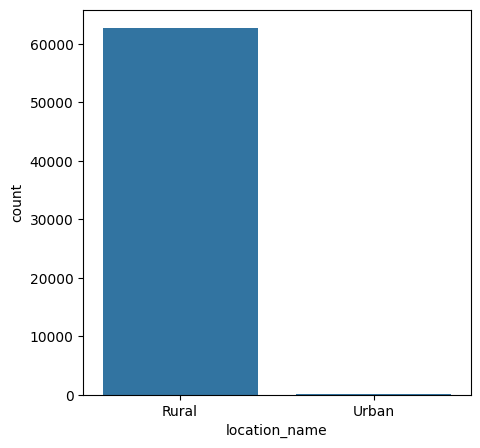

In [34]:
plt.figure(figsize= (5,5))
ax= sns.countplot(x="location_name", data= df)
plt.show()

<font color= green> <i>  <b>ii. Description about the distribution :


<ol><li>
    There is a huge difference in the data when it comes to location of the student
</li>
    <li>Most of them are from Rural region.</li>
</ol>



<font color= green> 
<h3> 2.1.2 home_language

<font color=green><b> <i> i. Distribution

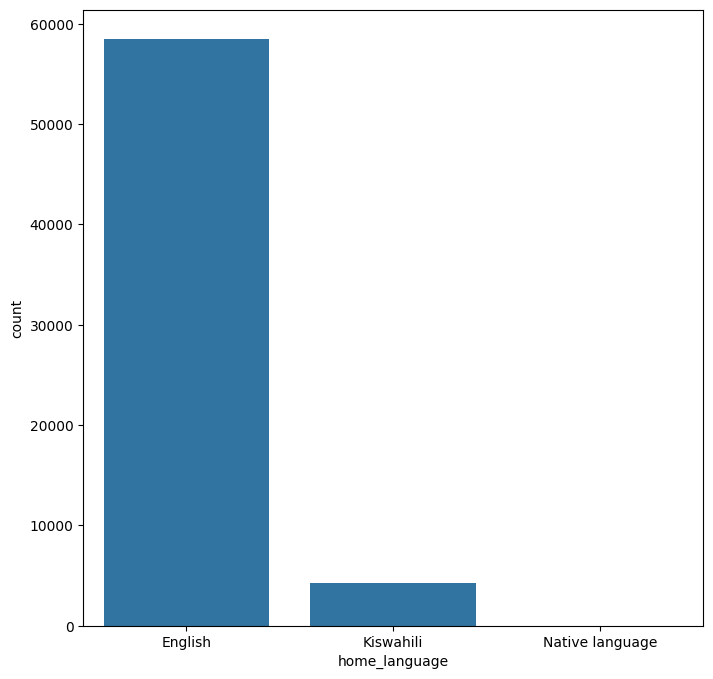

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(x='home_language', data=df)
plt.show()

<font color= green> <i>  <b>ii. Description about the distribution :


<ol><li>
    English is the most spoken language among the students.
</li>
    <li> Kiswahili being the second most spoken language with relaively low number of student speaking it. The number of student speaking Kiswahili is less than 5k</li>
</ol>


<font color= green> <h4> 2.1.3 hh_occupation       
           

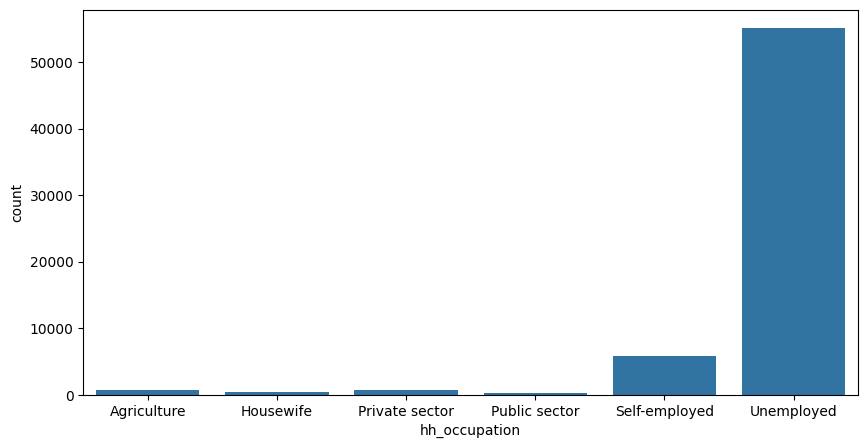

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='hh_occupation',data=df);

<font color= green> <i>  <b>ii. Description about the distribution :


<ol><li>
    Most of the students come from a household having unemployed parents.
</li>
    <li>Followed by few Self Employed households and very few in Agriculture, public sector, hoursewife and private sector</li>
</ol>



<font color= green> <h4> 2.1.4 hh_edu    
      
           
           

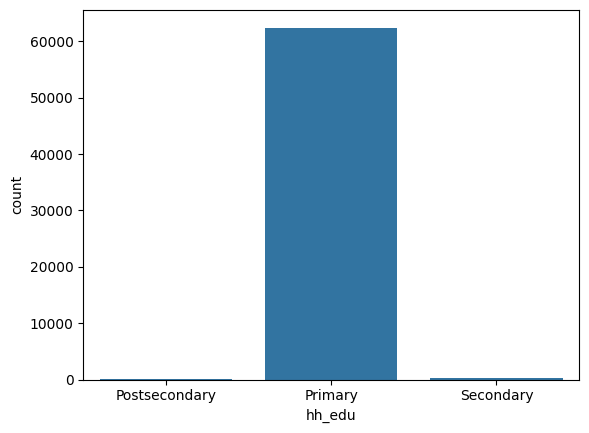

In [37]:
sns.countplot(x='hh_edu',data=df);


<font color= green> <h4> 2.1.5 hh_size       


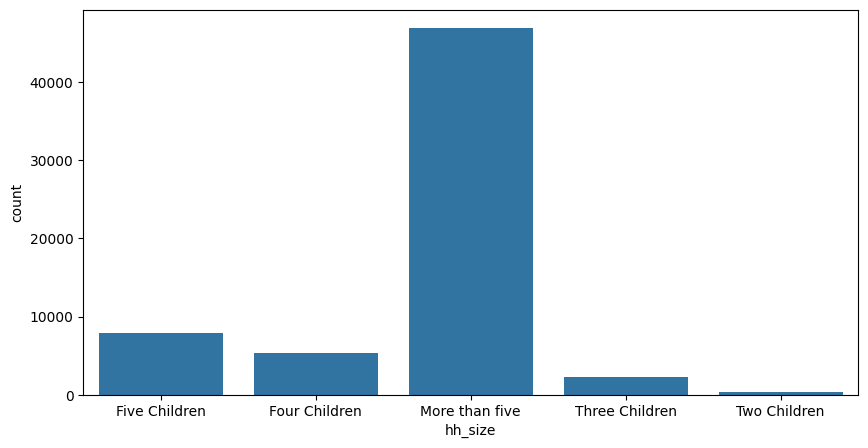

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='hh_size',data=df);


This shows that, most of the students family have household size of More than 5 members.

<font color= green> <h4> 2.1.6 school_distanceKm       



dtype('float64')

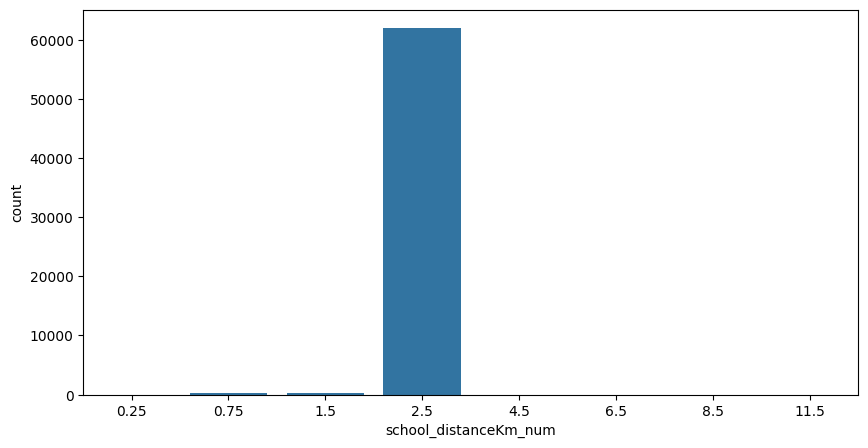

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='school_distanceKm_num',data=df)
df['school_distanceKm_num'].dtype

This shows that maximum number of students live 2-3km far from their school.

   
<font color= green> <h4> 2.1.7 gender 


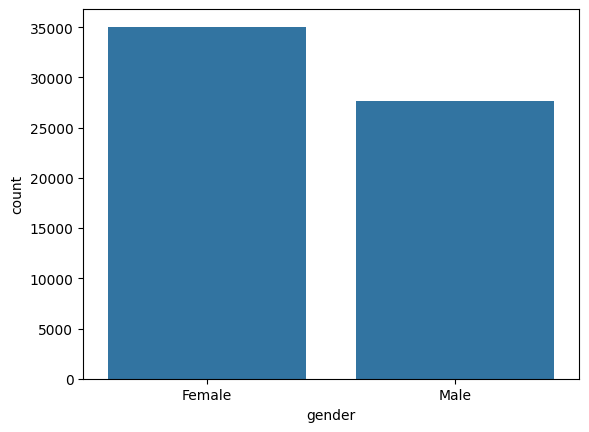

In [40]:
sns.countplot(x='gender',data=df);

     

<font color= green> <h4> 2.1.8 mothers_edu       



<Axes: xlabel='mothers_edu', ylabel='count'>

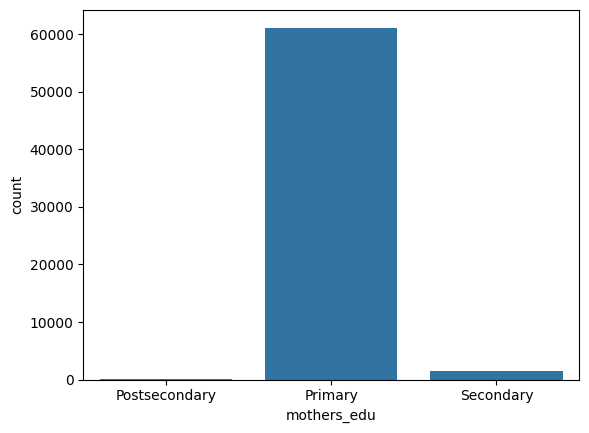

In [41]:
sns.countplot(x= 'mothers_edu', data=df)

This shows that, most of the students come from the background of their mother having just Primary Education. 
and a very few number have secondary education in hand.

<font color= green> <h4> 2.1.9 grade       



<Axes: xlabel='grade', ylabel='count'>

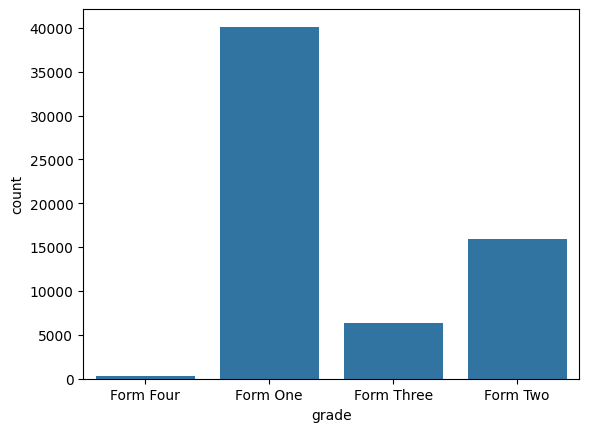

In [42]:
sns.countplot(x='grade',data=df)

<font color= green> <h4> 2.1.10 meansToSchool       


<Axes: xlabel='meansToSchool', ylabel='count'>

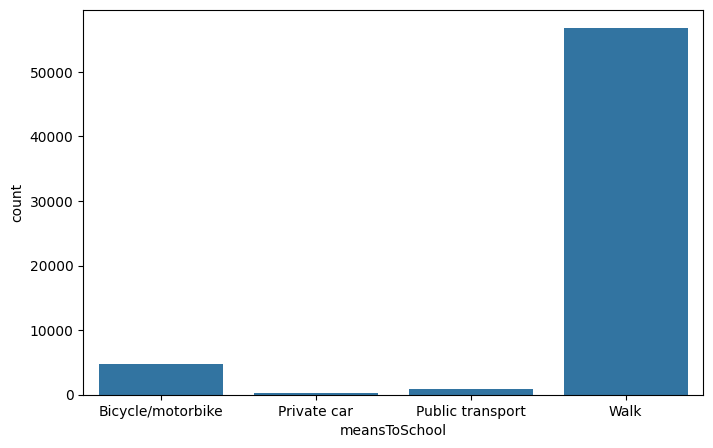

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='meansToSchool', data=df)

Here, We can see that a significant amount of students commute through walk. 


<font color= green> <h4> 2.1.11 hh_children


<Axes: xlabel='hh_children', ylabel='count'>

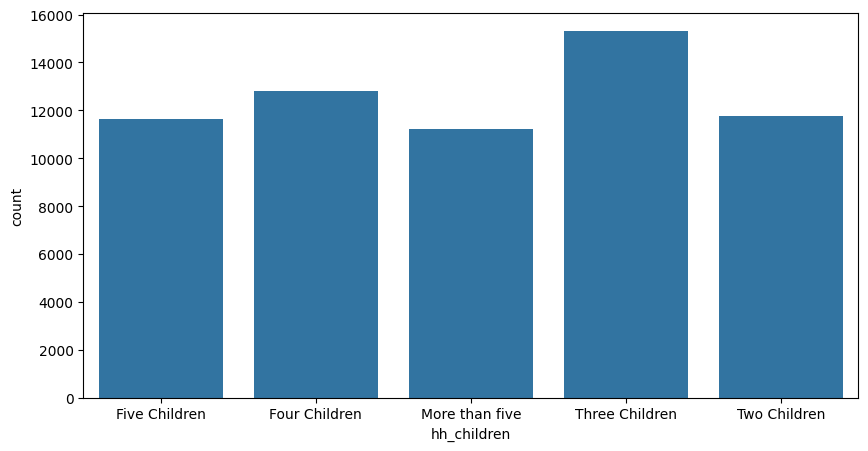

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='hh_children', data=df)

<font color= green> <h4> 2.1.12 dropout

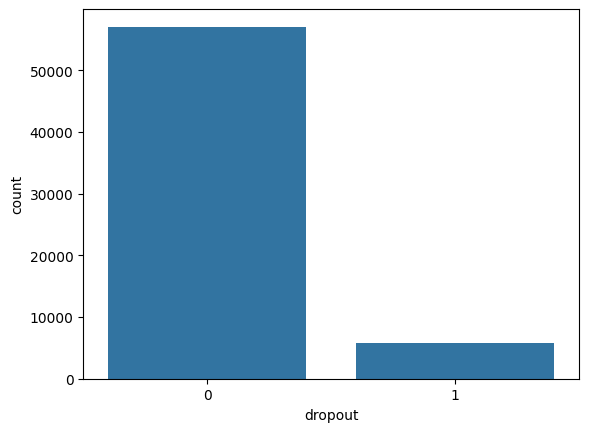

In [45]:
sns.countplot(x='dropout', data=df);

<font color= green> <h4> 2.1.13 age   

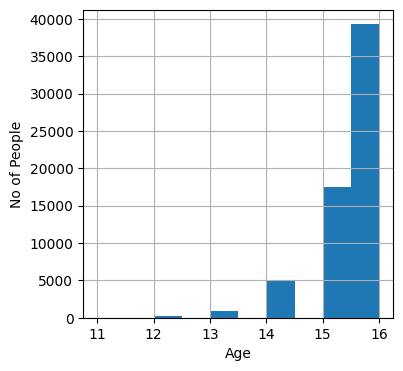

In [46]:
df["age"].hist(figsize=(4,4))
plt.xlabel('Age')
plt.ylabel('No of People')
plt.show()

<Axes: ylabel='age'>

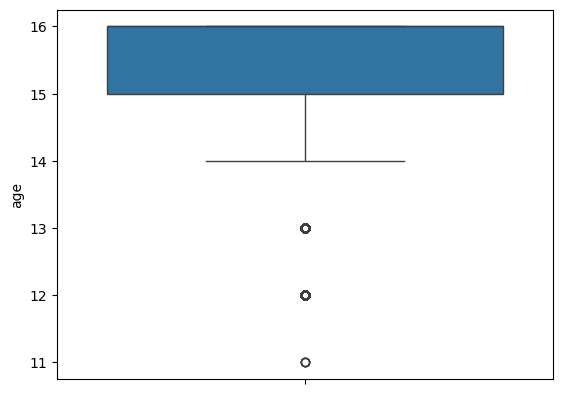

In [47]:
sns.boxplot(df['age'])

In [48]:
df[df["age"]<14].shape

(1008, 13)

# 2.2 Bi-Variate Analysis

# 2.2.1. Plotting  Age with Dropout

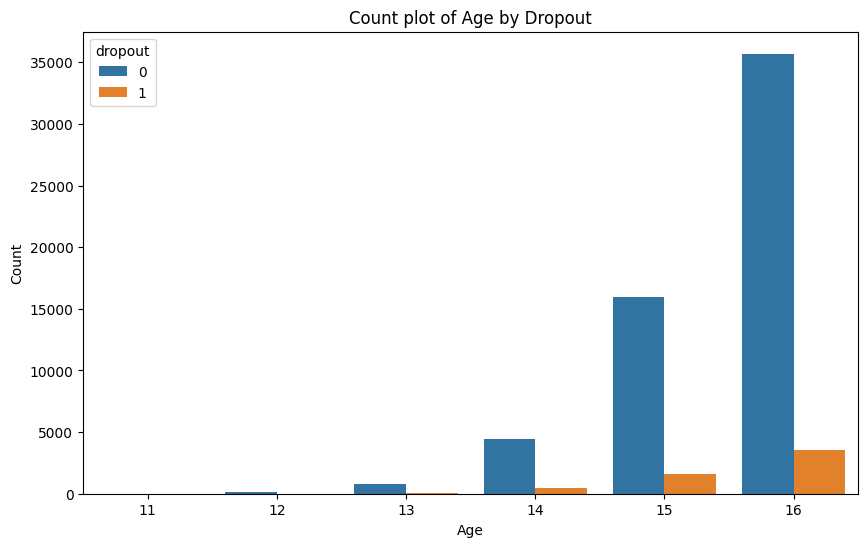

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='dropout', data=df)
plt.title('Count plot of Age by Dropout')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [50]:
df[["dropout","age"]].groupby(['dropout'], as_index=False).mean().sort_values(by="age", ascending=False)

,dropout,age
1,1,15.525670
0,0,15.511081


In [51]:
# 1. Importing Libraries:
import random

# 2. Data Filtering
'''This line filters the data DataFrame based on a condition related to the 'age' column.
It calculates the Z-score for each value in the 'age' column and selects only those rows where the absolute Z-score is less than 3.
The resulting filtered DataFrame is stored in the variable datatest.'''

datatest= df[np.abs(stats.zscore(df['age']))<3]

# 3. Splitting Data by 'income' Category:
'''These lines further split the datatest DataFrame into two separate Series based on the value of the 'income' column.
income_1 contains the 'age' values where 'income' is equal to 1.
income_0 contains the 'age' values where 'income' is equal to 0.'''

dropout_1= datatest[datatest['dropout']==1]['age']
dropout_0= datatest[datatest['dropout']==0]['age']

# 4. Sampling Data:
'''These lines convert the Series income_0 and income_1 to lists using the values.tolist() method.
Then, it randomly samples 100 values from each list using the random.sample() function.
The sampled values are stored back in the variables income_0 and income_1.'''

dropout_0= dropout_0.values.tolist()
dropout_0= random.sample(dropout_0, 100)
dropout_1= dropout_1.values.tolist()
dropout_1= random.sample(dropout_1, 100)

'''Overall, this code performs data filtering based on the 'age' column, 
splits the data by the 'income' category, and then randomly samples 100 values from each category. 
This process is often used for creating balanced datasets for analysis or modeling purposes.'''

"Overall, this code performs data filtering based on the 'age' column, \nsplits the data by the 'income' category, and then randomly samples 100 values from each category. \nThis process is often used for creating balanced datasets for analysis or modeling purposes."

In [52]:
from scipy.stats import ttest_ind
'''This line performs a t-test using the ttest_ind function.
It compares the means of two independent samples: income_1 and income_0.
The equal_var=False argument indicates that the function should perform a Welch's t-test, which does not assume equal variance between the samples.
The function returns two values: ttest (the calculated t-statistic) and pval (the p-value associated with the test).'''
ttest, pval= ttest_ind(dropout_1,dropout_0, equal_var= False)
print("ttest", ttest)
print("p value", pval)

if pval<=0.05:
    print("Reject the Null Hypo")
else:
    print("Accept the null hypo")

ttest 1.1456349578104943
p value 0.253333922447661
Accept the null hypo


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the age and dropout feature is independent on each other 

# 2.2.2. Plotting  Location Name with Dropout

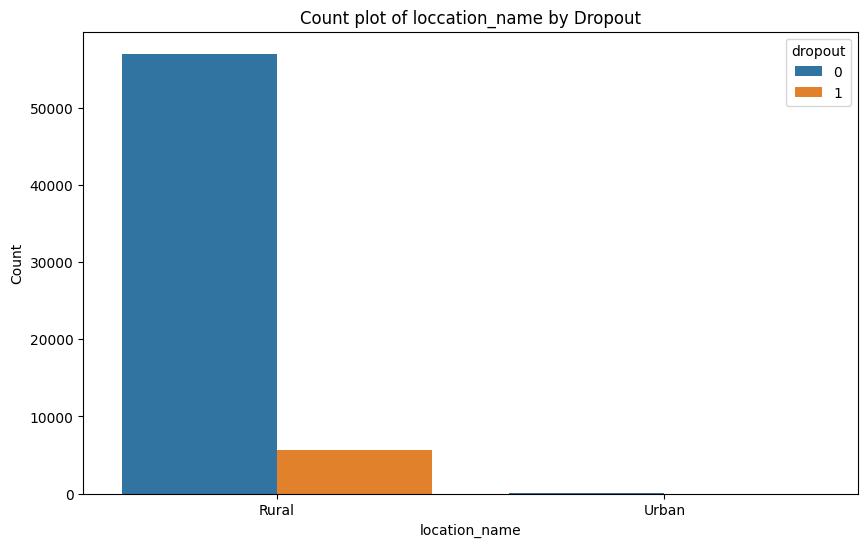

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='location_name', hue='dropout', data=df)
plt.title('Count plot of loccation_name by Dropout')
plt.xlabel('location_name')
plt.ylabel('Count')
plt.show()

In [54]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['location_name'], df['dropout'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between location_name and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between location_name and dropout")


Chi2: 0.31003155420653816
p-value: 0.577660823066896
Degrees of freedom: 1
Expected frequencies:
[[5.70056380e+04 5.70436204e+03]
 [2.63620396e+01 2.63796044e+00]]
..................................................................................................
Fail to reject the null hypothesis: No significant relationship between location_name and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the location_name and dropout feature is independent on each other. 

# 2.2.3. Plotting  Household Occupation(hh with Dropout

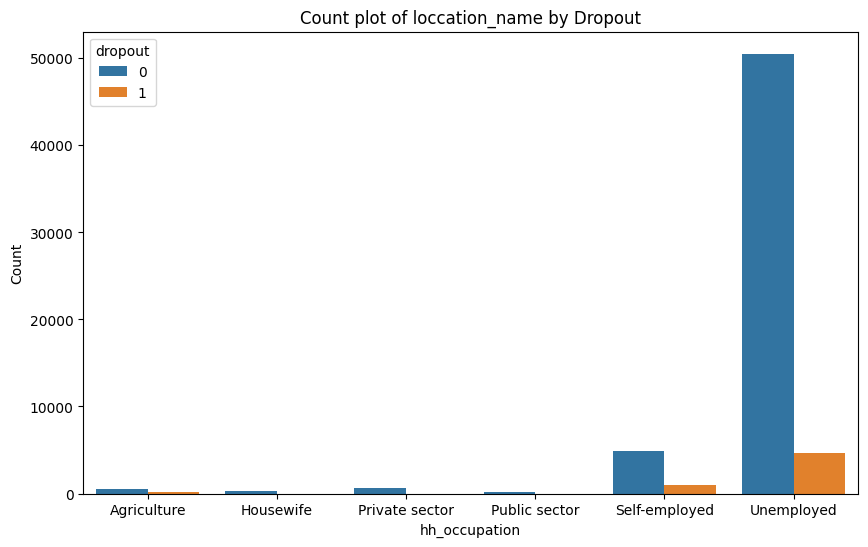

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hh_occupation', hue='dropout', data=df)
plt.title('Count plot of loccation_name by Dropout')
plt.xlabel('hh_occupation')
plt.ylabel('Count')
plt.show()


In [57]:
# Sample the DataFrame consistently for both columns
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['hh_occupation'], sampled_df['dropout'], margins=False)

contingency_table

dropout,0,1
hh_occupation,,
Agriculture,2,2
Housewife,2,0
Private sector,1,0
Public sector,0,1
Self-employed,26,5
Unemployed,197,15


In [58]:


# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between hh_occupation and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between hh_occupation and dropout")

Chi2: 21.14693496041965
p-value: 0.000759878174450884
Degrees of freedom: 5
Expected frequencies:
[[3.63346614e+00 3.66533865e-01]
 [1.81673307e+00 1.83266932e-01]
 [9.08366534e-01 9.16334661e-02]
 [9.08366534e-01 9.16334661e-02]
 [2.81593625e+01 2.84063745e+00]
 [1.92573705e+02 1.94262948e+01]]
..................................................................................................
Reject the null hypothesis: There is a significant relationship between hh_occupation and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is a significant difference and the hh_occupation and dropout feature is dependent on each other. 

# 2.2.4. Plotting  Mothers Education(mothers_edu) with Dropout

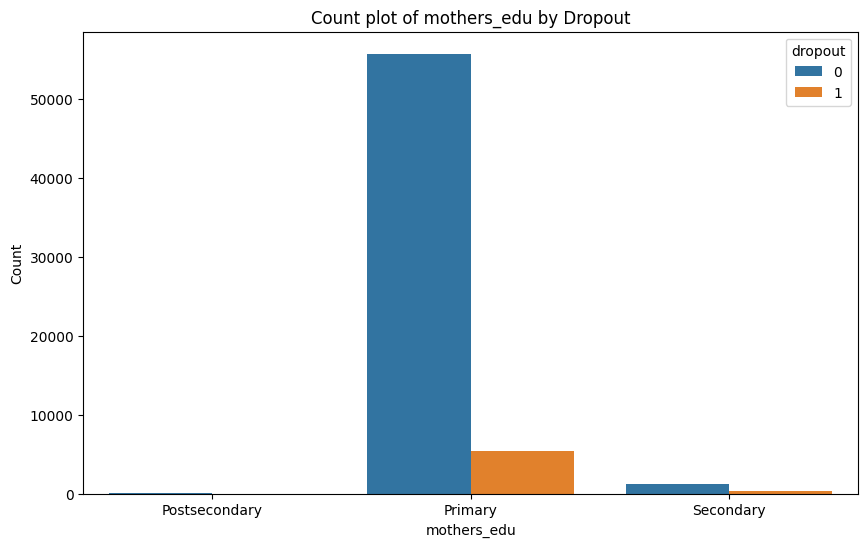

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mothers_edu', hue='dropout', data=df)
plt.title('Count plot of mothers_edu by Dropout')
plt.xlabel('mothers_edu')
plt.ylabel('Count')
plt.show()

In [60]:
# Sample the DataFrame consistently for both columns
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['mothers_edu'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
mothers_edu,,
Primary,219,23
Secondary,9,0


In [61]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between mothers_edu and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between mothers_edu and dropout")

Chi2: 0.1459716040860726
p-value: 0.7024151517201087
Degrees of freedom: 1
Expected frequencies:
[[219.8247012  22.1752988]
 [  8.1752988   0.8247012]]
..................................................................................................
Fail to reject the null hypothesis: No significant relationship between mothers_edu and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the mothers_edu and dropout feature is independent on each other. 

# 2.2.5. Plotting  Grade with Dropout

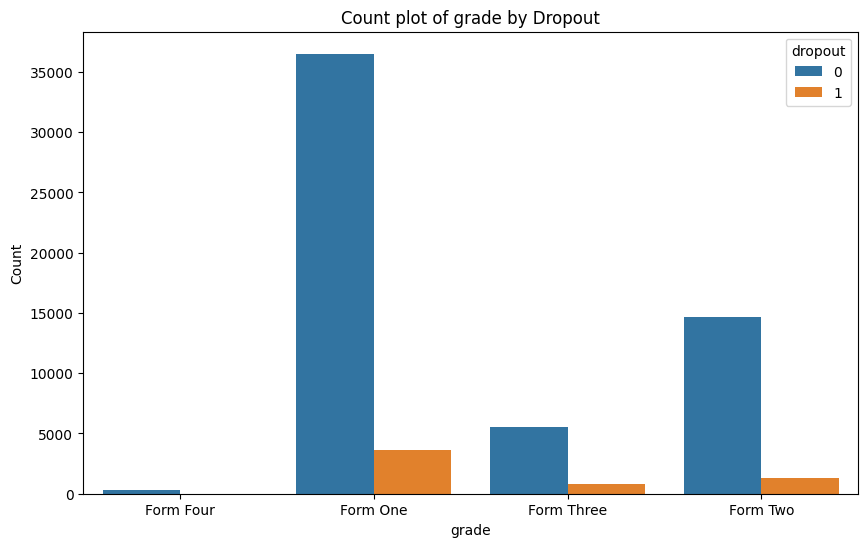

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='dropout', data=df)
plt.title('Count plot of grade by Dropout')
plt.xlabel('grade')
plt.ylabel('Count')
plt.show()

In [63]:
# Sample the DataFrame consistently for both columns
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['grade'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
grade,,
Form Four,3,0
Form One,140,19
Form Three,33,2
Form Two,52,2


In [84]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
 
if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between grade and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between grade and dropout")

Chi2: 0.3807389344312493
p-value: 0.5372080362620313
Degrees of freedom: 1
Expected frequencies:
[[129.89641434  13.10358566]
 [ 98.10358566   9.89641434]]
..................................................................................................
Fail to reject the null hypothesis: No significant relationship between grade and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the grade and dropout feature is independent on each other. 

# 2.2.6. Plotting  Means To School with Dropout

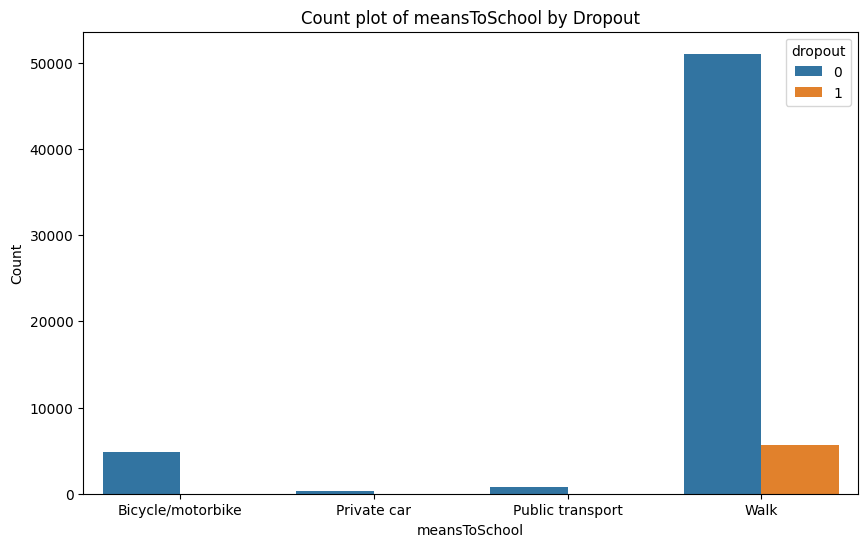

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='meansToSchool', hue='dropout', data=df)
plt.title('Count plot of meansToSchool by Dropout')
plt.xlabel('meansToSchool')
plt.ylabel('Count')
plt.show()

In [66]:
# Sample the DataFrame consistently for both columns 
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['meansToSchool'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
meansToSchool,,
Bicycle/motorbike,17,0
Private car,3,0
Public transport,7,0
Walk,201,23


In [67]:
# Create a contingency table
contingency_table = pd.crosstab(df['meansToSchool'], df['dropout'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between meansToSchool and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between meansToSchool and dropout")
   

Chi2: 660.9553334578962
p-value: 6.138392445039232e-143
Degrees of freedom: 3
Expected frequencies:
[[4.38791603e+03 4.39083967e+02]
 [3.03617973e+02 3.03820271e+01]
 [7.40864215e+02 7.41357848e+01]
 [5.15996018e+04 5.16339822e+03]]
..................................................................................................
Reject the null hypothesis: There is a significant relationship between meansToSchool and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the age and dropout feature is independent on each other. 

# 2.2.7. Plotting  Household Children(hh_children) with Dropout

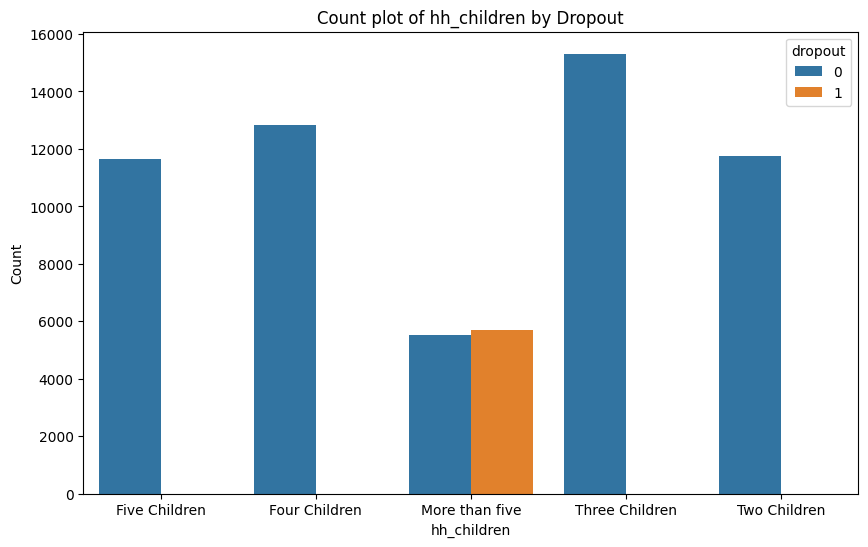

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hh_children', hue='dropout', data=df)
plt.title('Count plot of hh_children by Dropout')
plt.xlabel('hh_children')
plt.ylabel('Count')
plt.show()

In [69]:
# Sample the DataFrame consistently for both columns 
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['hh_children'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
hh_children,,
Five Children,38,0
Four Children,49,0
More than five,25,23
Three Children,60,0
Two Children,56,0


In [70]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between hh_children and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between hh_children and dropout")

Chi2: 107.08324195906434
p-value: 3.047175708002928e-22
Degrees of freedom: 4
Expected frequencies:
[[34.51792829  3.48207171]
 [44.50996016  4.49003984]
 [43.60159363  4.39840637]
 [54.50199203  5.49800797]
 [50.8685259   5.1314741 ]]
..................................................................................................
Reject the null hypothesis: There is a significant relationship between hh_children and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is a significant difference and the hh_children and dropout feature is dependent on each other. 

# 2.2.8. Plotting Household Education(hh_edu) with Dropout

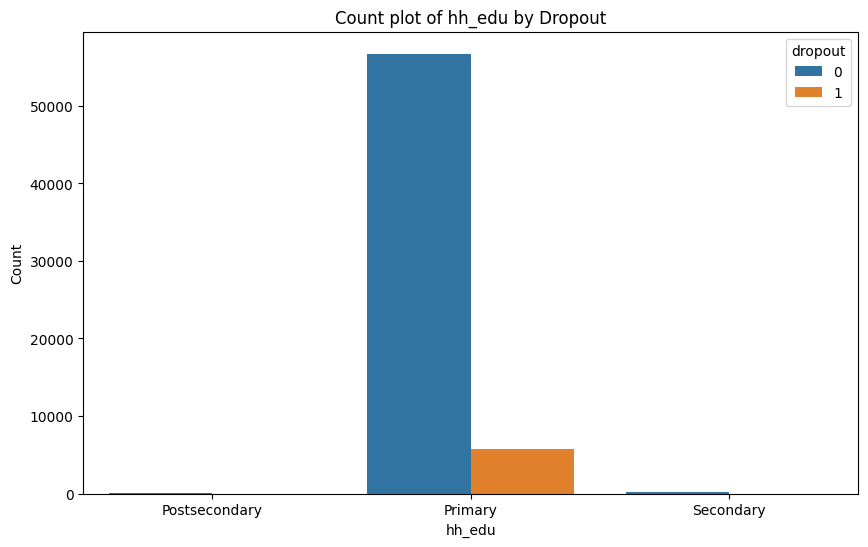

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hh_edu', hue='dropout', data=df)
plt.title('Count plot of hh_edu by Dropout')
plt.xlabel('hh_edu')
plt.ylabel('Count')
plt.show()

In [72]:
# Sample the DataFrame consistently for both columns 
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['hh_edu'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
hh_edu,,
Primary,224,23
Secondary,4,0


In [73]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between hh_edu and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between hh_edu and dropout")

Chi2: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[224.36653386  22.63346614]
 [  3.63346614   0.36653386]]
..................................................................................................
Fail to reject the null hypothesis: No significant relationship between hh_edu and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the hh_edu and dropout feature is independent on each other. 

# 2.2.9 Plotting Household Size(hh_size) with Dropout

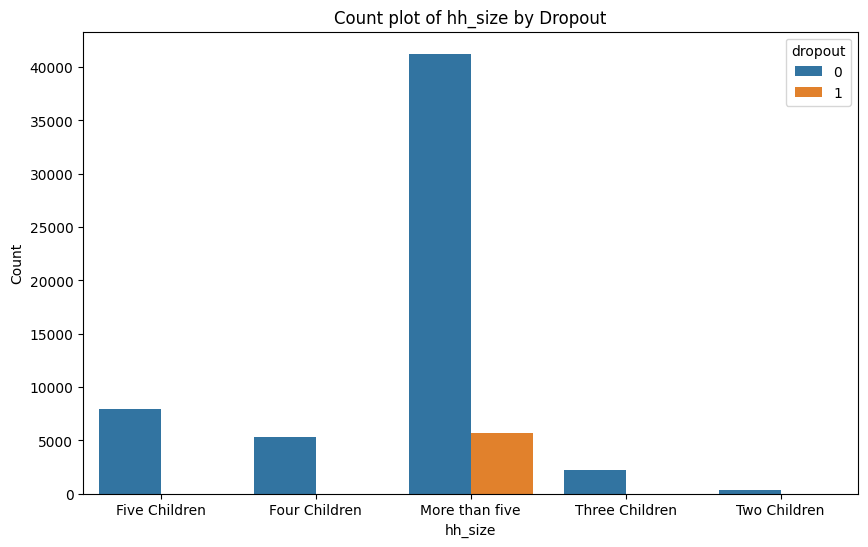

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hh_size', hue='dropout', data=df)
plt.title('Count plot of hh_size by Dropout')
plt.xlabel('hh_size')
plt.ylabel('Count')
plt.show()

In [75]:
# Sample the DataFrame consistently for both columns 
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['hh_size'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
hh_size,,
Five Children,32,0
Four Children,19,0
More than five,165,23
Three Children,10,0
Two Children,2,0


In [76]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between hh_size and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between hh_size and dropout")

Chi2: 8.484952407614783
p-value: 0.07534465748208687
Degrees of freedom: 4
Expected frequencies:
[[ 29.06772908   2.93227092]
 [ 17.25896414   1.74103586]
 [170.77290837  17.22709163]
 [  9.08366534   0.91633466]
 [  1.81673307   0.18326693]]
..................................................................................................
Fail to reject the null hypothesis: No significant relationship between hh_size and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the hh_size and dropout feature is independent on each other. 

# 2.2.10. Plotting  Distance To School(school_distanceKm) with Dropout

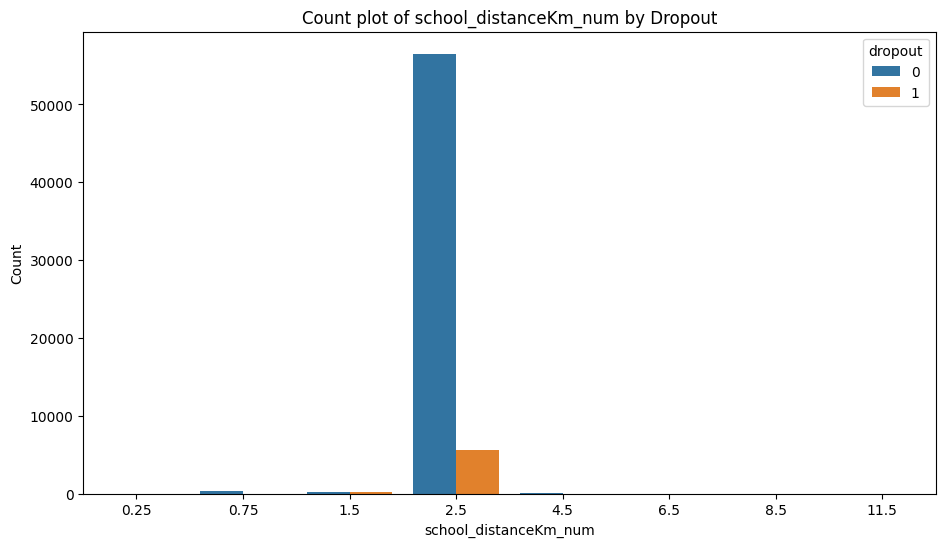

In [77]:
plt.figure(figsize=(11, 6))
sns.countplot(x='school_distanceKm_num', hue='dropout', data=df)
plt.title('Count plot of school_distanceKm_num by Dropout')
plt.xlabel('school_distanceKm_num')
plt.ylabel('Count')
plt.show()

In [78]:
# Sample the DataFrame consistently for both columns 
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['school_distanceKm_num'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
school_distanceKm_num,,
0.75,0,1
1.50,1,0
2.50,226,22
4.50,1,0


In [79]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between school_distanceKm_num and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between school_distanceKm_num and dropout")

Chi2: 10.140267832976548
p-value: 0.01741067675418496
Degrees of freedom: 3
Expected frequencies:
[[9.08366534e-01 9.16334661e-02]
 [9.08366534e-01 9.16334661e-02]
 [2.25274900e+02 2.27250996e+01]
 [9.08366534e-01 9.16334661e-02]]
..................................................................................................
Reject the null hypothesis: There is a significant relationship between school_distanceKm_num and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is a significant difference and the school_distanceKm_num and dropout feature is dependent on each other. 

# 2.2.11. Plotting Gender To Dropout

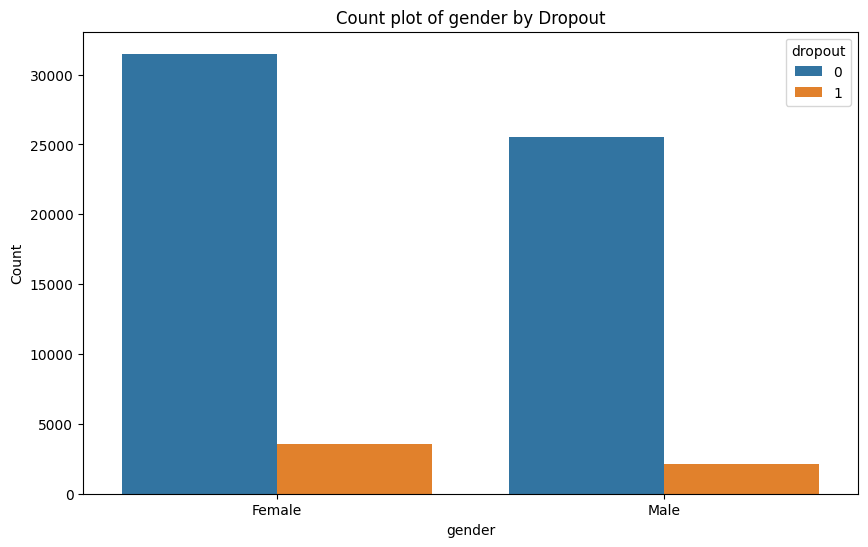

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='dropout', data=df)
plt.title('Count plot of gender by Dropout')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

In [81]:
# Sample the DataFrame consistently for both columns 
sampled_df = df.sample(frac=0.004, replace=True, random_state=1)

# Create a contingency table from the sampled data
contingency_table = pd.crosstab(sampled_df['gender'], sampled_df['dropout'], margins=False)
contingency_table

dropout,0,1
gender,,
Female,128,15
Male,100,8


In [82]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("..................................................................................................")
    print("Reject the null hypothesis: There is a significant relationship between gender and dropout")
else:
    print("..................................................................................................")
    print("Fail to reject the null hypothesis: No significant relationship between gender and dropout")

Chi2: 0.3807389344312493
p-value: 0.5372080362620313
Degrees of freedom: 1
Expected frequencies:
[[129.89641434  13.10358566]
 [ 98.10358566   9.89641434]]
..................................................................................................
Fail to reject the null hypothesis: No significant relationship between gender and dropout


# iv. Final Conclusion 
Using statistical analysis we can conclude that there is not any significant difference and the gender and dropout feature is independent of each other. 

# 3.1 Conclusion of Bivariate Analysis

Factors Influencing Dropout:

1. School Distance	
2. Means of Transportation
3. Household Children
4. Household Occupation

School Distance and Means of Transportation

